# **Question 1** - Integration Errors

## **a. Error Scaling**

**Why do the errors associated with the trapezoidal rule scale $\propto (\Delta x)^2$?**

In the trapezoidal rule, you approximate the area under the line by dividing it into equally spaced trapezoids and summing the areas of these trapezoids. Where $f(x)$ is the function that's being integrated over the interval [a, b] with n divisions, the width of each division $\Delta x$ (also known as $h$) can be found with $$\Delta x = \frac{b - a}{n}$$
 The error term is determined from the second derivative of $f(x)$; since the Trapezoidal rule is doing a linear fit between divisions, it truncated the Taylor expansion at the second-power polynomial term, which means it is therefore proportional to $\frac{f''(c)}{12}(\Delta x)^2$, where c is some point in the range of integration [a, b]. This tells us that as the interval $\Delta x$ decreases, the error decreases by the square.


**Why do the errors associated with Simpson's Rule scale $\propto (\Delta x)^4$?**

Simpsons rule is more accurate than the Trapezoidal rule; you approximate the integral of a function $f(x)$ over a given interval by dividing it into smaller divisions $\Delta x$ and using quadratic interpolation between each division. Since the quadratic interpolation is fitting a fourth order polynomial, from the Taylor expansion of this quadratic interpolation, the error here scales with the fourth derivative $f^4(x)$ of the function. Therefore, the error is proportional to the division size to the power of 4 $(\Delta x)^4$ .

## **b. Error proof**

If the value for the integral at spacing $h$ is $I_1$ and the value for the integral with spacing $2h$ is $I_2$:

**Show that the error in $I_1$ can be written $\epsilon _1\approx \frac{I_1 - I_2}{3}$ for the Trapezoidal Rule.**

The error in the Trapezoidal Rule can be expressed as $$E(h) = k_1h^2 = \epsilon _1 = X - I_1$$ 
$$\epsilon _1 + I_1 = X$$ 
where $k_1$ is some constant that depends on the specific function and interval and $X$ is the true value of the integral. Therefore, since we know that the error scales with $h^2$, with spacing $2h$ the error will be
$$E(2h) = k_1(2h)^2 = 4k_1h^2 = \epsilon_2 = X-I_2 = 4\epsilon_1$$
$$4\epsilon_1 = (\epsilon_1 + I_1) - I_2$$
$$3\epsilon_1 = I_1 - I_2$$
$$\therefore \epsilon_1 = \frac{I_1 - I_2}{3}$$

**Show that the error in $I_1$ can be written $\epsilon _1\approx \frac{I_1 - I_2}{15}$ for Simpson's Rule.**

Similar to above, the error in Simpson's Rule can be expressed as $$E(h) = k_1h^2 = \epsilon _1 = X - I_1$$ 
$$\epsilon _1 + I_1 = X$$ 
where $k_1$ is some constant that depends on the specific function and interval and $X$ is the true value of the integral. Therefore, since we know that the error scales with $h^4$, with spacing $2h$ the error will be
$$E(2h) = k_1(2h)^4 = 16k_1h^4 = \epsilon_2 = X-I_2 = 16\epsilon_1$$
$$16\epsilon_1 = X - I_2 = (\epsilon_1 + I_1) - I_2$$
$$15\epsilon_1 = I_1 - I_2$$
$$\therefore \epsilon_1 = \frac{I_1 - I_2}{15}$$

## **c. Compare Trapezoidal and Simpson's Rules**

"True" Integral = 1.4829743447687127
"True" Error = 5.408170986441626e-14

############
Trapezoidal Rule
############
T_1 = 1.4823547292600145
T_2 = 1.4805073649598721
Trapezoid Error = 0.0006157881000474763
Difference from "True" value = -0.000619615508698157

############
Simpson's Rule
############
S_1 = 1.4829705173600622
S_2 = 1.4829048187332472
Simpson Error = 4.379908454336482e-06
Difference from "True" value = -3.827408650458608e-06



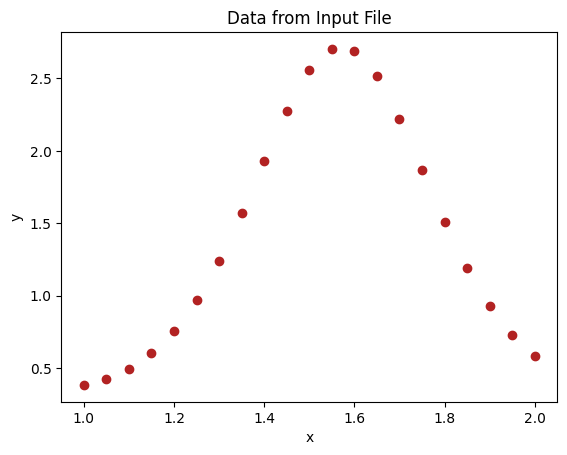

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.interpolate

a2_data = np.loadtxt('a2_data.txt', delimiter=' ', unpack = True)
data_x, data_y = a2_data[0], a2_data[1]

plt.plot(data_x, data_y, 'o', color = 'firebrick')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data from Input File')

# We know data originates from an exponential function with a sine argument
orig_func = lambda x: np.exp(np.sin(5*x))

# Calculate the integral of the exponential function
true_int, true_error = scipy.integrate.quad(orig_func, 1, 2)

print(f'"True" Integral = {true_int}\n"True" Error = {true_error}\n')

# Calculate the integral of the data using the TRAPEZOIDAL rule
trap_int_1 = scipy.integrate.trapezoid(data_y, data_x)
trap_int_2 = scipy.integrate.trapezoid(data_y[::2], data_x[::2])
trap_error = (trap_int_1 - trap_int_2)/3
trap_true_error = (trap_int_1 - true_int)

print('############\nTrapezoidal Rule\n############')
print(f'T_1 = {trap_int_1}\nT_2 = {trap_int_2}\nTrapezoid Error = {trap_error}\nDifference from "True" value = {trap_true_error}\n')

# Calculate the integral of the data using SIMPSON'S rule
simp_int_1 = scipy.integrate.simpson(data_y, data_x)
simp_int_2 = scipy.integrate.simpson(data_y[::2], data_x[::2])
simp_error = (simp_int_1 - simp_int_2)/15
simp_true_error = (simp_int_1 - true_int)

print('############\nSimpson\'s Rule\n############')
print(f'S_1 = {simp_int_1}\nS_2 = {simp_int_2}\nSimpson Error = {simp_error}\nDifference from "True" value = {simp_true_error}\n')




## **d. True Error**

In [31]:
print("Actual Trapezoid Error:", trap_true_error)
print("Estimated Trap Error:", trap_error)
print(f"Actual error is {abs(trap_true_error/trap_error)*100}% of the estimated error.")

print("\nActual Simpson Error:", simp_true_error)
print("Estimated Simpson Error:", simp_error)
print(f"Actual error is {abs(simp_true_error/simp_error)*100}% of the estimated error.")

# Get Ratio of Errors
ratio = trap_error/simp_error
print(f'\nRatio of Errors = {ratio}')
N = 21 # Number of points to use for interpolation
print(f'N^2 = {N**2}')
print(f"1/N^2 = {1/(N**2)}\n1/N^4 = {1/(N**4)}")


Actual Trapezoid Error: -0.000619615508698157
Estimated Trap Error: 0.0006157881000474763
Actual error is 100.6215463810336% of the estimated error.

Actual Simpson Error: -3.827408650458608e-06
Estimated Simpson Error: 4.379908454336482e-06
Actual error is 87.38558557472012% of the estimated error.

Ratio of Errors = 140.59382895041875
N^2 = 441
1/N^2 = 0.0022675736961451248
1/N^4 = 5.141890467449262e-06


We can see that the Trapezoidal Rule produces a worse result (by a few orders of mangitude) for the function integral than Simpson's Rule, which is what we would expect, as it tends to be worse at fitting very non-linear functions such as the one we have here. However, the error estimate is almost perfect compared tot he real error, although the error estimates (``simp_error`` and ``trap_error``) are all very close to the "true" error values (``simp_true_error`` and ``trap_true_error``).

# **Question 2** - Chemical Potential of a Fermi Gas

## **a. Evaluate Integral**

In statistical mechanics, the chemical potential $\mu$ of a gas on N non-interacting fermions in a volume V is given by the integral
$$ N = V\int_0^{\infty} \frac{8\pi p^2dp}{h^3}\frac{1}{1 + e^{(\epsilon - \mu)k_BT}} = V\int_0^{\infty} \frac{8\pi p^2dp}{h^3}\frac{1}{1 + e^{x - a}}$$
where $x = \epsilon/k_BT$, $p = \sqrt{2m\epsilon}$, $a = \mu/k_BT$, and $d\epsilon = k_BTdx$

$$ N = V\int_0^{\infty} \frac{8\pi (mk_BT)^{1/2}\sqrt{2xdx}}{h^3}\frac{1}{1 + e^{x - a}} $$

and substituting in $nQ = (mk_BT/2\pi\hbar^2)^{3/2}$

$$ N = V\int_0^{\infty} \frac{4n_Q}{\sqrt{\pi}}\frac{\sqrt{x}dx}{1 + e^{x - a}} $$

Therefore,

$$ \frac{N}{n_QV} = \frac{4}{\sqrt{\pi}}\int_0^{\infty}\frac{\sqrt{x}dx}{1 + e^{x - a}} =  \frac{4}{\sqrt{\pi}}\int_0^{\infty}\frac{\sqrt{x}e^{-x}dx}{e^{-x} + e^{-a}}$$

The aim here is to vary $a = \frac{\mu}{k_BT}$ and get out some values of $\frac{N}{n_QV}$ by numerically integrating the integral.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
import scipy as sc

def integral_func(x, a):
    ''' Function to integrate over
        We split up the exponential into e^(-x) and e^(-a) to avoid overflow

        Parameters:
        -----------
        x : float
            x-value to evaluate the function at
        a : float
            mu/kT value
        
        Returns:
        --------
        res : float
            Value of the function at x
    '''
    
    coefficient = 4/np.sqrt(np.pi)
    top = np.sqrt(x)*np.exp(-x)
    bottom = np.exp(-x) + np.exp(-a)
    res = coefficient*top/bottom
    return res

a_list = np.linspace(-10, 10, 100) # a = mu/kT values to use
integral_list = np.zeros_like(a_list) # List to store the integral values in
error_list = np.zeros_like(a_list) # List to store the errors in

for i, a in enumerate(a_list):
    temp_int_result, temp_error = sc.integrate.quad(integral_func, 0.0, np.inf, args = (a,)) # Perform the integral
    integral_list[i] = temp_int_result # Store the integral value
    error_list[i] = temp_error # Store the error value

 Following this, the aim is to create an interpolation function that will produce a value of $\frac{\mu}{k_BT}$ given a value of $\frac{N}{n_QV}$. The results of the interpolation is displayed on the graph.

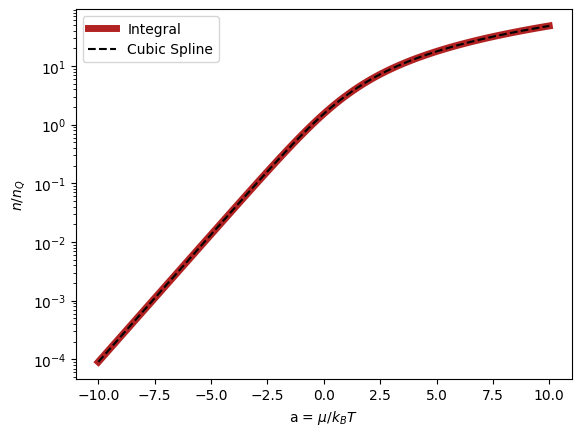

In [45]:
# Interpolate using a cubic spline
a_spline = sc.interpolate.CubicSpline(integral_list, a_list)
interp_a = a_spline(integral_list)

# Plot the results
plt.figure(1)

plt.plot(a_list, integral_list, label = 'Integral', linewidth = 5, color = 'firebrick')
plt.plot(interp_a, integral_list, label = 'Cubic Spline', linestyle = '--', color = 'black')

plt.xlabel('a = $\mu/k_BT$')
plt.ylabel('$n/n_Q$')
plt.yscale('log')
plt.legend()
plt.show()

Here, the non-degenerate limit is $a = ln(\frac{n}{2n_Q})$ and the degenerate limit is $a = (\frac{3\sqrt{\pi}}{8})(\frac{n}{n_Q})^{2/3}$.

## **b. Error and Accuracy**

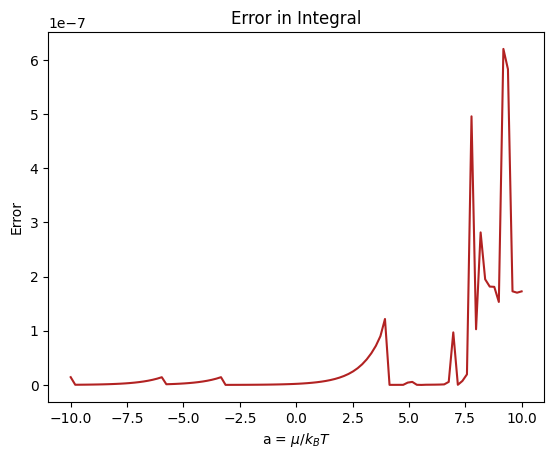

In [48]:
# Plot the error
plt.figure(1)
plt.plot(a_list, error_list, label = 'Error', color = 'firebrick')
plt.xlabel('a = $\mu/k_BT$')
plt.ylabel('Error')
plt.title('Error in Integral')
plt.show()

We can see that, while the error remains relatively small throughout the range of $a = \mu/k_BT$, it begins to grow rapidly at higher values. This could be because, as $a$ grows, it dominates the denominator of the integrand, bringing the integral closer 0.

## **c. Compare to Analytic Limits**

Compare the results with the analytic limits of:
- Non-degenerate Fermions $\mu = k_BT\ln(n/2n_Q)$ 
- Degenerate Fermions $\mu = E_F = p^2_F/2m = (\hbar(3\pi^2n)^{1/3})^2/2m$

and find the region of parameter space where each of these limits is accurate to 1%.

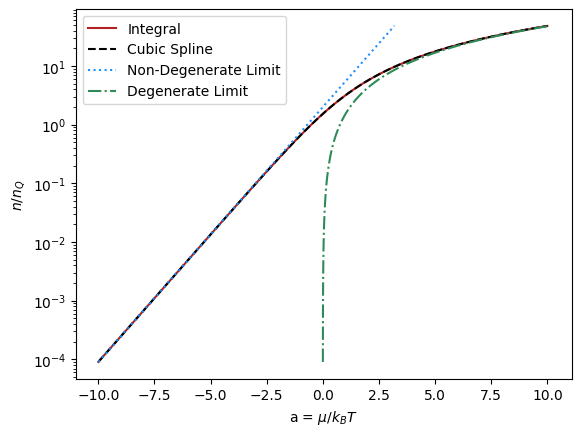

Non-Degenerate Limit is valid for n/n_Q < 0.12787 and a < -2.72727
Degenerate Limit is valid for n/n_Q > 41.18004 and a > 8.98990


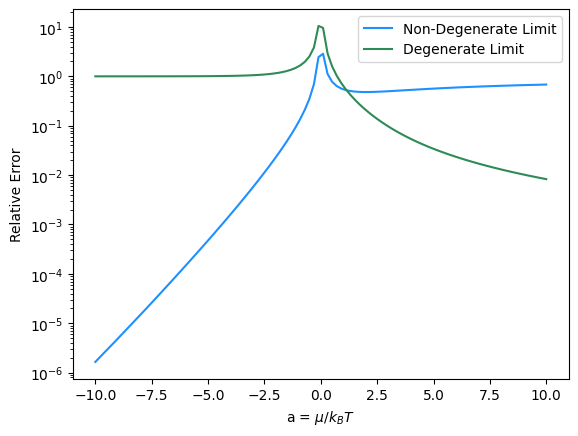

In [46]:
# Compute the degenerate and non-degenerate limits
a_nondegen = lambda n: np.log(n/2)
a_degen = lambda n: ((3*np.sqrt(np.pi)/8)*n)**(2/3)

# Plot the results
plt.figure(1)

plt.plot(a_list, integral_list, label = 'Integral', color = 'firebrick')
plt.plot(interp_a, integral_list, label = 'Cubic Spline', linestyle = '--', color = 'black')
plt.plot(a_nondegen(integral_list), integral_list, label = 'Non-Degenerate Limit', linestyle = ':', color = 'dodgerblue')
plt.plot(a_degen(integral_list), integral_list, label = 'Degenerate Limit', linestyle = '-.', color = 'seagreen')

plt.xlabel('a = $\mu/k_BT$')
plt.ylabel('$n/n_Q$')
plt.yscale('log')
plt.legend()
plt.show()

# Find where the error crosses 1%
err_nondegen = np.abs((a_nondegen(integral_list) - interp_a)/interp_a)
err_degen = np.abs((a_degen(integral_list) - interp_a)/interp_a)

# Find the index where the error crosses 1%
index_nondegen = np.where(err_nondegen < 0.01)[0][-1]
index_degen = np.where(err_degen > 0.01)[0][-1]

# Print the results
print(f'Non-Degenerate Limit is valid for n/n_Q < {integral_list[index_nondegen]:.5f} and a < {a_spline(integral_list[index_nondegen]):.5f}')
print(f'Degenerate Limit is valid for n/n_Q > {integral_list[index_degen]:.5f} and a > {a_spline(integral_list[index_degen]):.5f}')

# Plot the error
plt.figure(2)
plt.plot(interp_a, err_nondegen, label = 'Non-Degenerate Limit', color = 'dodgerblue')
plt.plot(interp_a, err_degen, label = 'Degenerate Limit', color = 'seagreen')
plt.xlabel('a = $\mu/k_BT$')
plt.ylabel('Relative Error')
plt.yscale('log')
plt.legend()
plt.show()

# **Question 3** - Maxwell Boltzmann

## **a. Generate numbers in a Maxwell-Boltzmann distribution**

The 3D Maxwell Boltzmann distribution is $$f(v)d^3v =\sqrt{\frac{2}{\pi}}v^2\exp({\frac{-v^2}{2}})d^3v$$

Here, I have sampled values on the x-axis according to a Gaussian distribution, because the Maxwell Boltzmann distribution is very similar to a Gaussian, and y-values according to a normal distribution. Then I have used the rejection method to only keep those values which meet the following condition: $$ y = \frac{f(x_i)}{p(x_i)} $$

This results in only the points below the Maxwell-Boltzmann curve being accepted. This algorithm can generate 1,000,000 velocities in < 1 seconds.

In [133]:
import numpy as np
import matplotlib.pyplot as plt

def mb_func(x):
    return (4/np.pi**0.5) * x**3 * np.exp(-x**2) * np.log(10.0)

def MaxwellBoltzmann(N):
    v_max = 5.0
    num_samples = 5*N
    x = v_max * np.random.rand(num_samples)
    y = np.random.rand(num_samples) * np.exp(-1)

    mask = y < x**2*np.exp(-x**2)

    keep_x = x[mask]
    keep_y = y[mask]
    bad_x = x[~mask]
    bad_y = y[~mask]

    return keep_x[:N], keep_y[:N], bad_x, bad_y


Generated 1000000 samples in 0.318 seconds
Acceptance Fraction: 1.0
Number of velocities generated: 1000000
Time taken: 0.31799793243408203 seconds


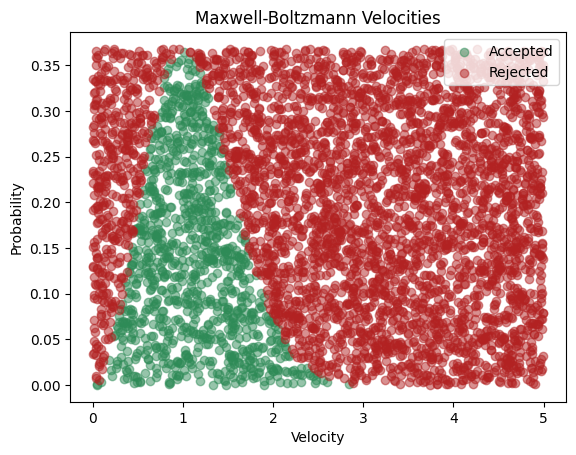

In [134]:
import time

N_values = int(int(1e6))
start = time.time()
keep_x, keep_y, bad_x, bad_y = MaxwellBoltzmann(N_values)
end = time.time()

print(f'Generated {N} samples in {end - start:.3f} seconds')
print(f"Acceptance Fraction: {len(keep_x)/N_values}")
print(f"Number of velocities generated: {N_values}")
print(f"Time taken: {end-start} seconds")

# Plot the results
keep_every = 1000

plt.figure()
plt.scatter(keep_x[::keep_every], keep_y[::keep_every], label = "Accepted", alpha = 0.5, color = "seagreen")
plt.scatter(bad_x[::keep_every], bad_y[::keep_every], label = "Rejected", alpha = 0.5, color = "firebrick")
plt.title("Maxwell-Boltzmann Velocities")
plt.xlabel("Velocity")
plt.ylabel("Probability")
plt.legend(loc = "upper right")
plt.show()

## **b. Compare Histogram**

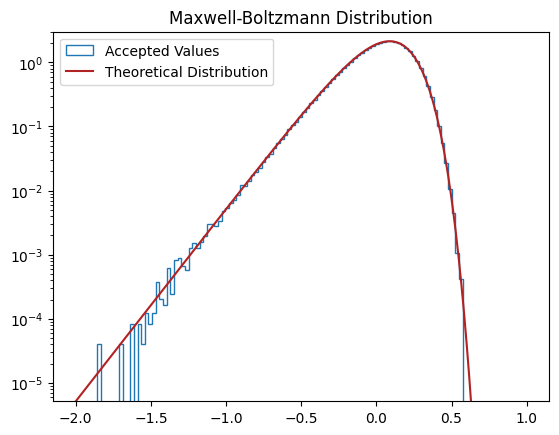

In [135]:
plot_x = 10**np.linspace(-2, 1, 1000)
mb_dist = mb_func(plot_x)

plt.figure(1)
plt.hist(np.log10(keep_x), density=True, bins = 100, label = "Accepted Values", histtype = "step")
plt.plot(np.log10(plot_x), mb_dist, c = "firebrick", label = "Theoretical Distribution")
plt.yscale("log")
plt.ylim((mb_dist[0], 3))
plt.title("Maxwell-Boltzmann Distribution")
plt.legend()

## **c. Average Velocity**

We expect the error to scale with $\frac{1}{\sqrt{N}}$.

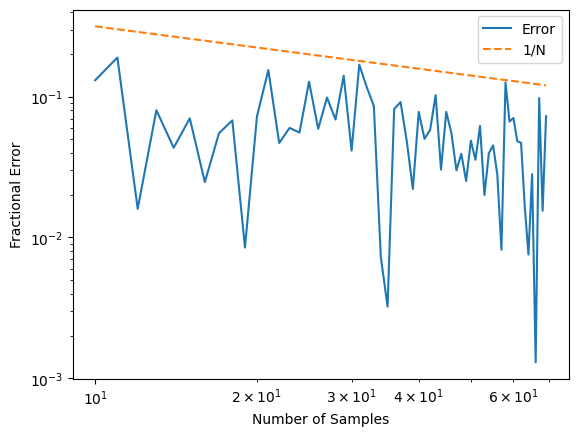

In [139]:
steps_array = 10*np.arange(1, 7, 0.1)
error_array = np.zeros_like(steps_array)

v_analytic = (4/np.pi)**0.5

for i, N in enumerate(steps_array):
    keep_x, _, _, _ = MaxwellBoltzmann(int(N))
    v_mean = np.mean(keep_x)
    error_array[i] = abs((v_mean - v_analytic)/v_analytic)

plt.figure(1)
plt.loglog(steps_array, error_array, label = "Error")
plt.plot(steps_array, 1/np.sqrt(steps_array), label = "1/N", linestyle = "--")
plt.xlabel("Number of Samples")
plt.ylabel("Fractional Error")
plt.legend()
plt.show()

We can see that the fractional error approximately follows the $1/N$ curve that we would expect.